# Part 5 - Morphological Operators

- Morphological Operators are sets of Kernels that can achieve a variety of effects, such as reducing noise.
- Certain operators are very good at reducing black points (and vice versa).
- Certain operators can also achieve an erosion and dilation effect that can add or erode from an existing image.
- This effect is most easily seen on text data, so we will practice various morphological operators on some simple white text on a black background.

In [3]:
# import custom methods from parent directory
import os
import sys

current_dir = os.path.abspath("")
parent_dir  = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from utilities import show_img

# regular imports
import numpy as np
import cv2

In [9]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="ABCDE", org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=10)
    return blank_img

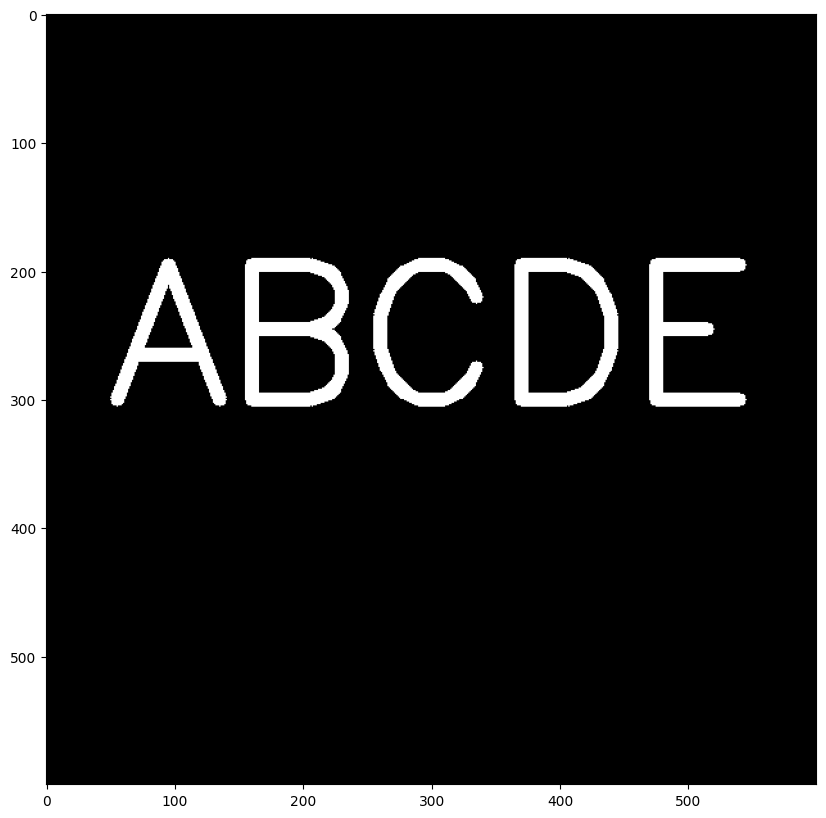

In [10]:
img = load_img()

show_img(img, figsize=(12, 10))

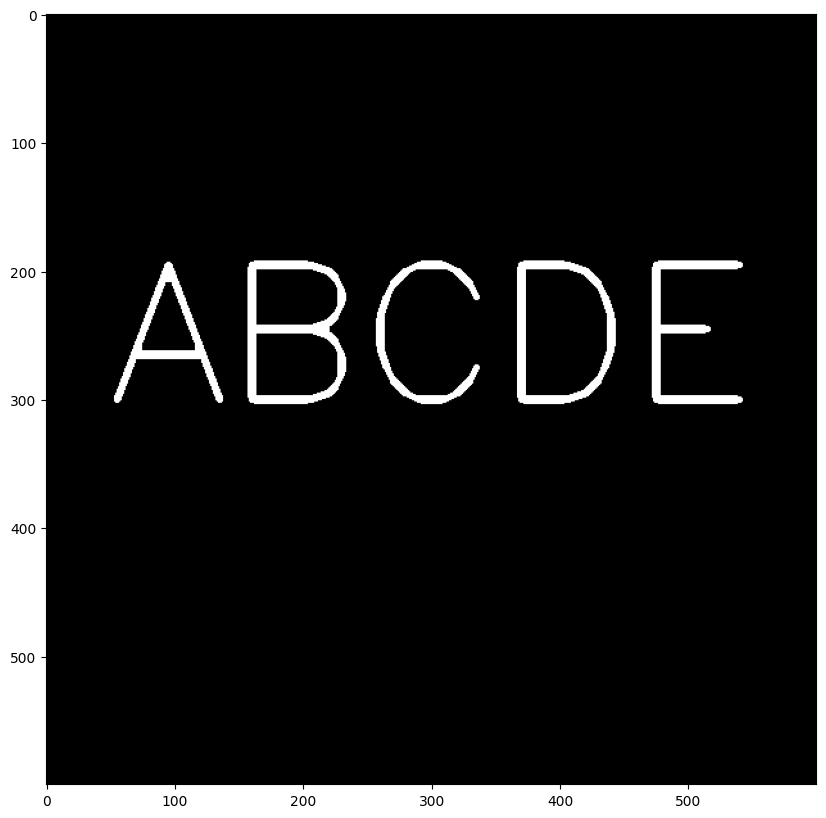

In [12]:
kernel = np.ones((5, 5), dtype=np.uint8)

result = cv2.erode(img, kernel=kernel, iterations=1)

show_img(result, figsize=(12, 10))

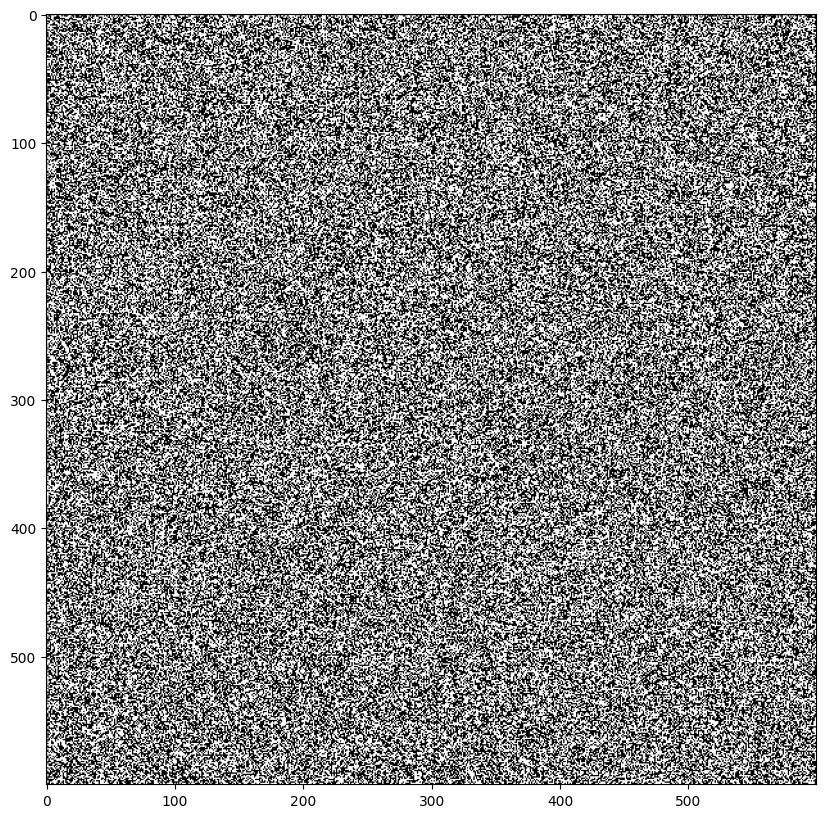

In [14]:
img = load_img()

white_noise = np.random.randint(low=0, high=2, size=(600, 600)) # high is exclusive

show_img( white_noise, figsize=(12, 10))

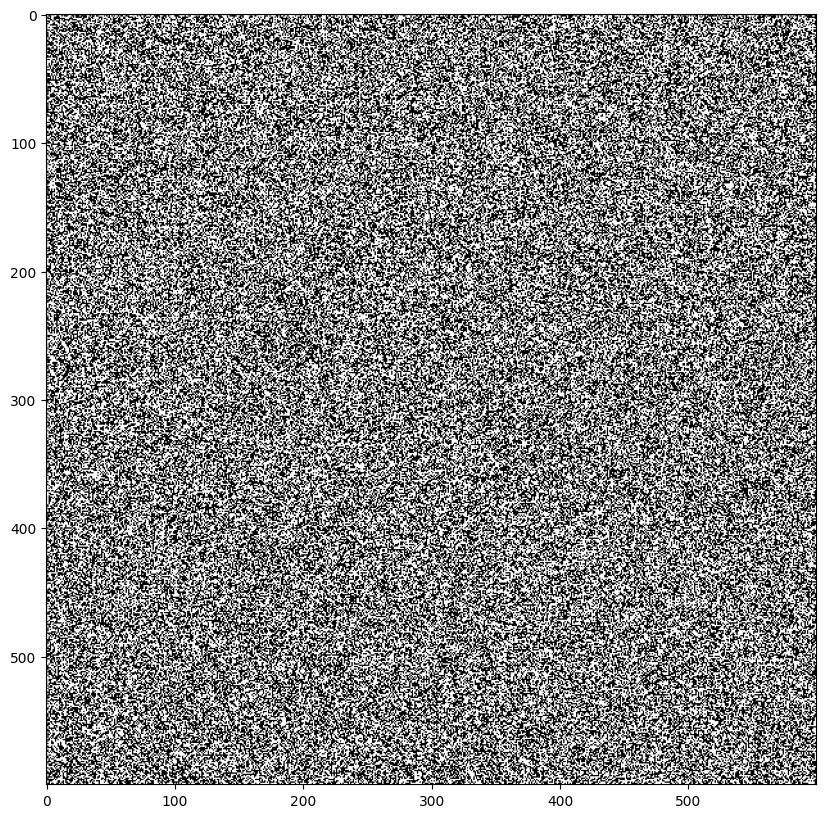

In [15]:
white_noise = white_noise * 255  # rescale the image
 
show_img( white_noise, figsize=(12, 10) )

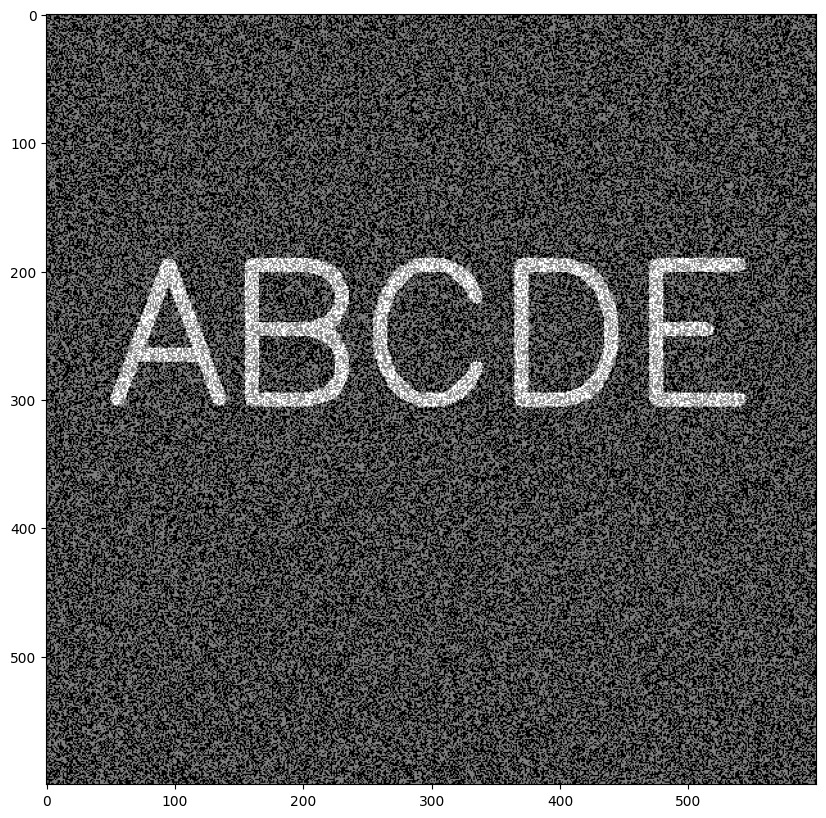

In [16]:
noise_img = white_noise + img

show_img( noise_img, figsize=(12, 10) )

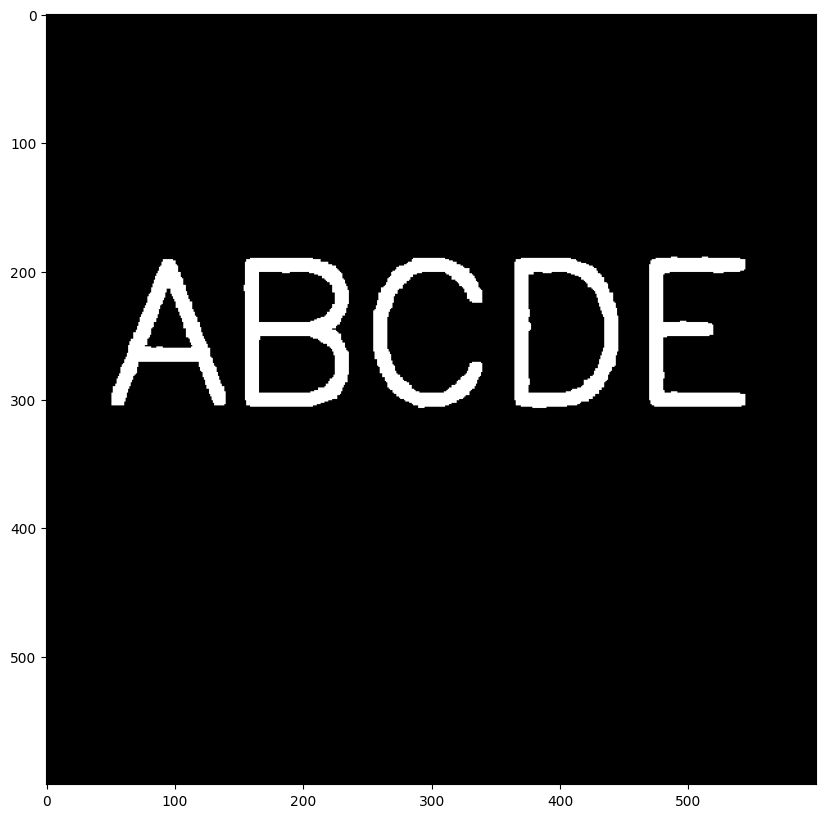

In [17]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

show_img(opening, figsize=(12, 10))

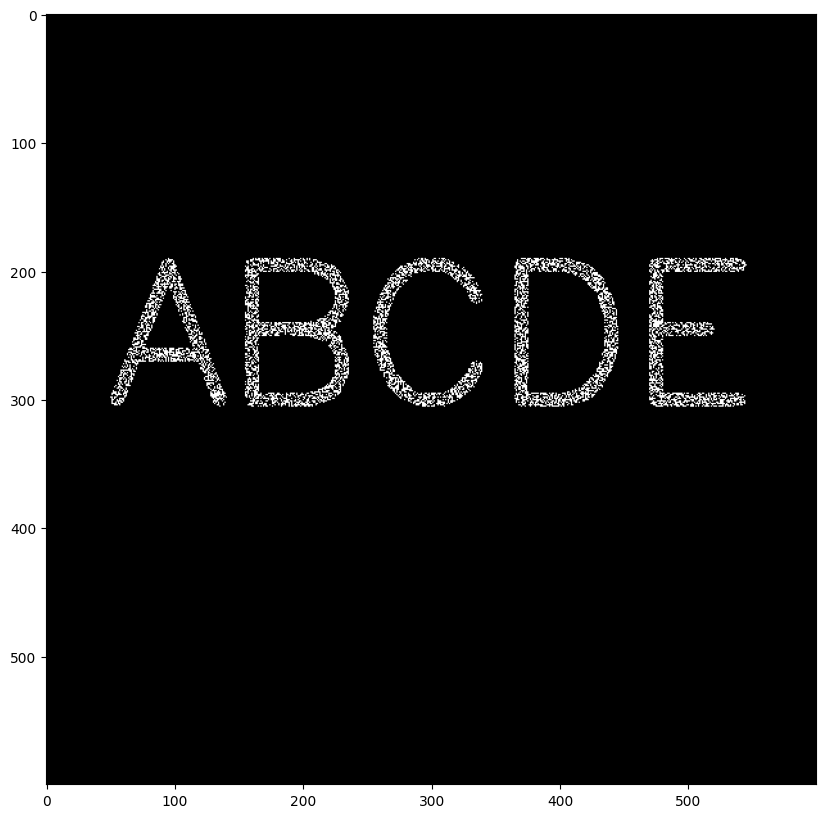

In [20]:
img = load_img()

black_noise = np.random.randint(low=0, high=2, size=(600, 600))  # high is exclusive
# this will not effect the black image, but effect the foreground image
black_noise = black_noise * -255 

black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0

show_img(black_noise_img, figsize=(12, 10))

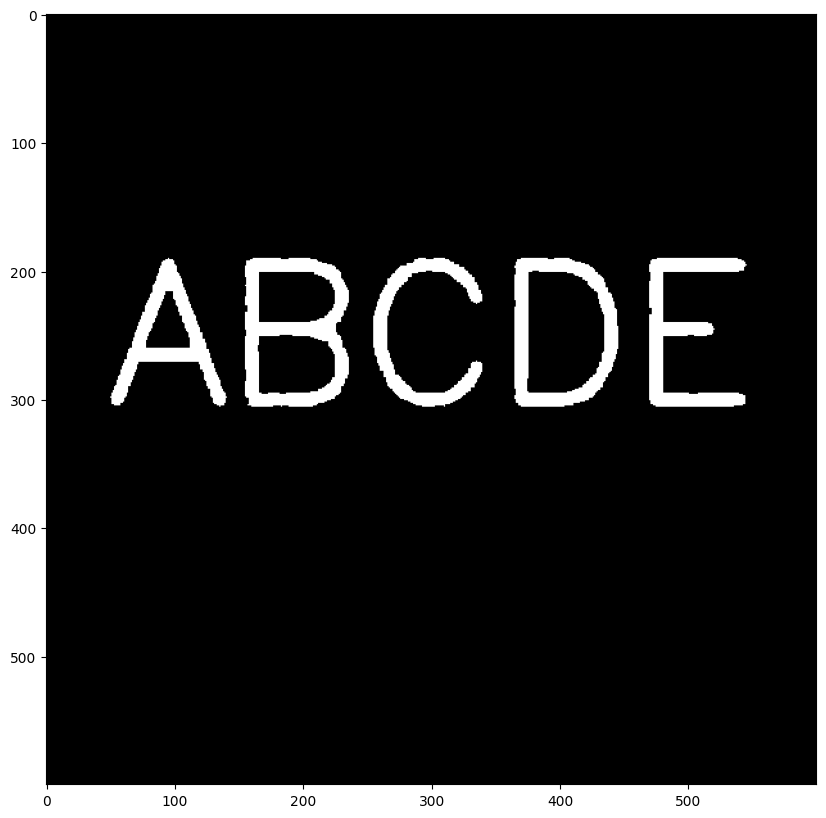

In [21]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

show_img(closing, figsize = (12, 10))

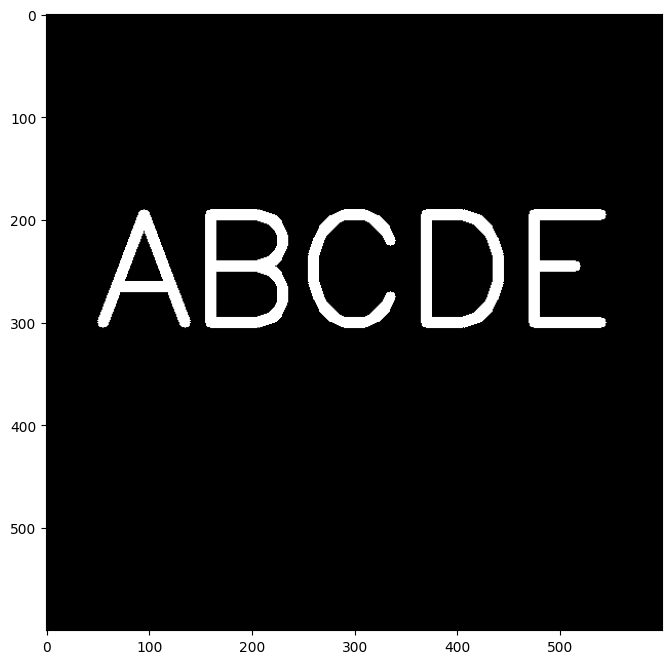

In [22]:
img = load_img()

show_img(img, figsize = (8, 8))

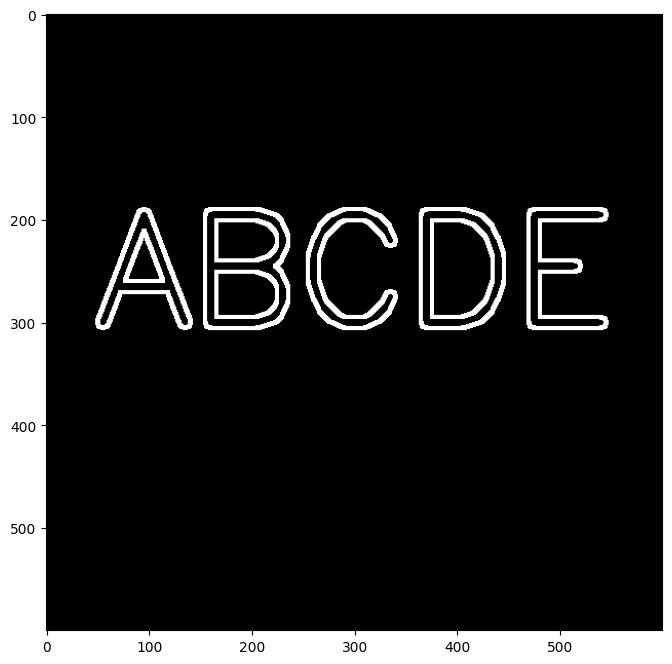

In [23]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

show_img(gradient, figsize = (8, 8))